# Machine Learning Project
## Written by Ki Young Han

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import gensim

In [3]:
#import file
news_df = pd.read_csv('Eluvio_DS_Challenge.csv')
news_df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


### Exploratory Data Analysis

#### numerical features:

In [3]:
news_df.describe()

,time_created,up_votes,down_votes
count,5.092360e+05,509236.000000,509236.0
mean,1.380240e+09,112.236283,0.0
std,7.090436e+07,541.694675,0.0
min,1.201232e+09,0.000000,0.0
25%,1.341585e+09,1.000000,0.0
50%,1.392909e+09,5.000000,0.0
75%,1.436527e+09,16.000000,0.0
max,1.479817e+09,21253.000000,0.0


Above indicates, only "up_votes" features is valid feature for further analysis. "down_votes" feature is made up of only 0 so it is not useful.

Worth mention: Maximum "up_votes" is 21253 and 50 percentile and 75 percentile are 5 upvotes and 16 upvotes, respectively. 

#### feature: over_18

In [4]:
news_df['over_18'].value_counts()

False    508916
True        320
Name: over_18, dtype: int64

In [5]:
x = 508916/len(news_df)*100
print("{:.3f}".format(x))

99.937


Roughly 99.34% ariticles are not over 18. So feature is not useful.

#### feature: category

In [10]:
news_df['category'].value_counts()

worldnews    509236
Name: category, dtype: int64

100% of all article category are worldnews. So this is not useful feature as well

#### feature: author

In [11]:
news_df['author'].value_counts()

davidreiss666     8897
anutensil         5730
DoremusJessup     5037
maxwellhill       4023
igeldard          4013
                  ... 
menachem_begin       1
StopThePresses       1
YellowSox91          1
idimmu               1
RyanJSuto            1
Name: author, Length: 85838, dtype: int64

In [12]:
print("Top 100 authors wrotes: "+"{:.3f}% news articles".format(sum(news_df['author'].value_counts().head(100))/len(news_df)*100))
print("Top 200 authors wrotes: "+"{:.3f}% news articles".format(sum(news_df['author'].value_counts().head(200))/len(news_df)*100))
print("Top 300 authors wrotes: "+"{:.3f}% news articles".format(sum(news_df['author'].value_counts().head(300))/len(news_df)*100))
print("Top 400 authors wrotes: "+"{:.3f}% news articles".format(sum(news_df['author'].value_counts().head(400))/len(news_df)*100))
print("Top 500 authors wrotes: "+"{:.3f}% news articles".format(sum(news_df['author'].value_counts().head(500))/len(news_df)*100))
print("Top 1000 authors wrotes: "+"{:.3f}% news articles".format(sum(news_df['author'].value_counts().head(1000))/len(news_df)*100))

Top 100 authors wrotes: 24.519% news articles
Top 200 authors wrotes: 31.056% news articles
Top 300 authors wrotes: 35.299% news articles
Top 400 authors wrotes: 38.483% news articles
Top 500 authors wrotes: 41.056% news articles
Top 1000 authors wrotes: 49.408% news articles


#### feature: up_votes

In [13]:
news_df['up_votes'].value_counts()

0       93555
1       46619
2       44195
3       36112
4       29917
        ...  
2692        1
7104        1
5406        1
7455        1
5930        1
Name: up_votes, Length: 5782, dtype: int64

In [14]:
print("{:.3f}% of articles have 0 upvote".format(news_df['up_votes'].value_counts()[0]/len(news_df)*100))

18.372% of articles have 0 upvote


In [15]:
news_df['up_votes'].describe()

count    509236.000000
mean        112.236283
std         541.694675
min           0.000000
25%           1.000000
50%           5.000000
75%          16.000000
max       21253.000000
Name: up_votes, dtype: float64

In [16]:
news_df['up_votes'].describe()[6]

16.0

### As part of sampling method, I decided to sample instances with more than 100 upvotes 9.897% dataset

In [4]:
news_df_sub = news_df[news_df['up_votes'] >= 100 ]

In [18]:
news_df_sub.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
144,1202836399,2008-02-12,117,0,BBC cover Anonymous Scientology Protests!,False,amph,worldnews
387,1203693419,2008-02-22,196,0,Morbidly Obese Man Confused Why Fire Officials...,False,bgholt1970,worldnews
392,1203700787,2008-02-22,113,0,*sigh* Time to update this again [pic],False,shivermetimberslads,worldnews
652,1204361112,2008-03-01,112,0,Israeli minister vows Palestinian holocaust,False,igeldard,worldnews
769,1204569293,2008-03-03,136,0,The Gaza Bombshell: Vanity Fair reports on h...,False,netbuzz,worldnews


In [19]:
news_df_sub.describe()

,time_created,up_votes,down_votes
count,5.039700e+04,50397.000000,50397.0
mean,1.395211e+09,1046.903843,0.0
std,6.037792e+07,1411.803450,0.0
min,1.202836e+09,100.000000,0.0
25%,1.361275e+09,194.000000,0.0
50%,1.405894e+09,425.000000,0.0
75%,1.443349e+09,1250.000000,0.0
max,1.479798e+09,21253.000000,0.0


In [9]:
print("{:.3f}% dataset are used".format(len(news_df_sub)/len(news_df)*100))

9.897% dataset are used


In [21]:
len(news_df_sub['author'].unique())

16833

In [22]:
len(news_df_sub['author'])

50397

In [23]:
news_df['up_votes'].value_counts()

0       93555
1       46619
2       44195
3       36112
4       29917
        ...  
2692        1
7104        1
5406        1
7455        1
5930        1
Name: up_votes, Length: 5782, dtype: int64

<AxesSubplot:ylabel='Frequency'>

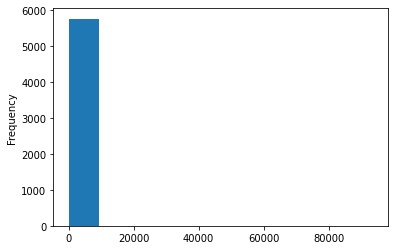

In [24]:
news_df['up_votes'].value_counts().plot(kind='hist')

In [25]:
news_df['author'].value_counts()

davidreiss666     8897
anutensil         5730
DoremusJessup     5037
maxwellhill       4023
igeldard          4013
                  ... 
menachem_begin       1
StopThePresses       1
YellowSox91          1
idimmu               1
RyanJSuto            1
Name: author, Length: 85838, dtype: int64

## NLP
### Which words associates with most upvotes?

In [3]:
#pip install texthero
https://texthero.org/docs/getting-started
    https://github.com/jbesomi/texthero


The following command must be run outside of the IPython shell:

    $ pip install texthero

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [10]:
#cleaning title

import texthero as hero
from texthero import preprocessing
#news_df['clean_text'] = hero.clean(news_df['author'])
custom_pipeline = [preprocessing.fillna,
                   preprocessing.lowercase,
                   preprocessing.remove_whitespace,
                   preprocessing.remove_punctuation,
                   preprocessing.remove_stopwords]
news_df_sub['clean_text'] = hero.clean(news_df_sub['title'], custom_pipeline)

C:\Users\kyhan\Anaconda3\lib\site-packages\texthero\preprocessing.py:131: FutureWarning: The default value of regex will change from True to False in a future version.
  return input.str.replace(rf"([{string.punctuation}])+", symbol)
C:\Users\kyhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [26]:
news_df_sub.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,clean_text
144,1202836399,2008-02-12,117,0,BBC cover Anonymous Scientology Protests!,False,amph,worldnews,bbc cover anonymous scientology protests
387,1203693419,2008-02-22,196,0,Morbidly Obese Man Confused Why Fire Officials...,False,bgholt1970,worldnews,morbidly obese man confused fire officials u...
392,1203700787,2008-02-22,113,0,*sigh* Time to update this again [pic],False,shivermetimberslads,worldnews,sigh time update pic
652,1204361112,2008-03-01,112,0,Israeli minister vows Palestinian holocaust,False,igeldard,worldnews,israeli minister vows palestinian holocaust
769,1204569293,2008-03-03,136,0,The Gaza Bombshell: Vanity Fair reports on h...,False,netbuzz,worldnews,gaza bombshell vanity fair reports bush tr...


In [35]:
# leave only unique words for each title. 
def unique_list(l):
    ulist = []
    [ulist.append(x) for x in l if x not in ulist]
    return ulist

In [33]:
for num in range(len(news_df_sub)):
    news_df_sub['clean_text'].iloc[num] =' '.join(unique_list(news_df_sub['clean_text'].iloc[num].split()))

C:\Users\kyhan\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [36]:
news_df_sub.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,clean_text
144,1202836399,2008-02-12,117,0,BBC cover Anonymous Scientology Protests!,False,amph,worldnews,bbc cover anonymous scientology protests
387,1203693419,2008-02-22,196,0,Morbidly Obese Man Confused Why Fire Officials...,False,bgholt1970,worldnews,morbidly obese man confused fire officials ups...
392,1203700787,2008-02-22,113,0,*sigh* Time to update this again [pic],False,shivermetimberslads,worldnews,sigh time update pic
652,1204361112,2008-03-01,112,0,Israeli minister vows Palestinian holocaust,False,igeldard,worldnews,israeli minister vows palestinian holocaust
769,1204569293,2008-03-03,136,0,The Gaza Bombshell: Vanity Fair reports on h...,False,netbuzz,worldnews,gaza bombshell vanity fair reports bush tried ...


In [44]:
# Initializing Dictionary
title_dict = {}

#word counter but instead of adding frequency of word, this will add up_vote number for each title so it will weight each word by up_votes. 
for num in range(len(news_df_sub)):
    for word in news_df_sub['clean_text'].iloc[num].split(): 
        if word not in title_dict:
            title_dict[word] = 0
        title_dict[word] += news_df_sub['up_votes'].iloc[num]

In [58]:
title_dict = dict(sorted(title_dict.items(), key=lambda item: item[1], reverse=True))

In [63]:
sorted(title_dict.items(), key=lambda item: item[1], reverse=True)[:100]

[('says', 3411420),
 ('us', 3151983),
 ('world', 2907953),
 ('new', 2789554),
 ('government', 2218935),
 ('people', 2148758),
 ('000', 2115632),
 ('year', 2007124),
 ('u', 1956631),
 ('russia', 1945269),
 ('years', 1878210),
 ('isis', 1847199),
 ('police', 1846282),
 ('china', 1805360),
 ('first', 1765021),
 ('president', 1673612),
 ('one', 1546247),
 ('north', 1521224),
 ('uk', 1497041),
 ('state', 1467212),
 ('said', 1458328),
 ('russian', 1456337),
 ('country', 1409550),
 ('korea', 1355075),
 ('found', 1300711),
 ('killed', 1273590),
 ('1', 1267194),
 ('war', 1242755),
 ('two', 1229861),
 ('million', 1203622),
 ('old', 1200496),
 ('saudi', 1172580),
 ('minister', 1155986),
 ('court', 1135860),
 ('un', 1119493),
 ('could', 1114306),
 ('man', 1059112),
 ('say', 1044649),
 ('attack', 1041937),
 ('law', 1041195),
 ('women', 1035166),
 ('2', 1025831),
 ('death', 1012250),
 ('germany', 1006708),
 ('south', 996413),
 ('report', 988520),
 ('turkey', 982400),
 ('india', 976435),
 ('time', 96

In [9]:
news_df_sub2 = news_df_sub[['up_votes', 'title']].copy()

In [10]:
news_df_sub2.head()

,up_votes,title
144,117,BBC cover Anonymous Scientology Protests!
387,196,Morbidly Obese Man Confused Why Fire Officials...
392,113,*sigh* Time to update this again [pic]
652,112,Israeli minister vows Palestinian holocaust
769,136,The Gaza Bombshell: Vanity Fair reports on h...


In [13]:
news_df_sub2.sort_values('up_votes', axis=0, ascending=False).head(20)

,up_votes,title
377200,21253,A biotech startup has managed to 3-D print fak...
391415,13435,Twitter has forced 30 websites that archive po...
450818,13244,2.6 terabyte leak of Panamanian shell company ...
391318,12333,The police officer who leaked the footage of t...
390252,11288,Paris shooting survivor suing French media for...
449809,11108,Hundreds of thousands of leaked emails reveal ...
397215,10922,Brazil s Supreme Court has banned corporate co...
390494,10515,ISIS beheads 81-year-old pioneer archaeologist...
500786,10394,Feeding cows seaweed could slash global greenh...
388230,10377,Brazilian radio host famous for exposing corru...


In [1]:
news_df_sub.sort_values('up_votes', axis=0, ascending=False)

NameError: name 'eluvio_df_sub' is not defined

In [18]:
news_df_sub['clean_text'] 

144               bbc cover anonymous scientology protests 
387       morbidly obese man confused  fire officials  u...
392                              sigh  time  update    pic 
652             israeli minister vows palestinian holocaust
769        gaza bombshell  vanity fair reports   bush tr...
                                ...                        
509107    india  set  launch   2 billion renewable energ...
509108    jean claude juncker mounts fresh call  europea...
509118    lockheed martin lands massive  1 2 billion con...
509142    turkey  pm withdraws bill  would pardon men  s...
509144    rice farming  india much older  thought  used ...
Name: clean_text, Length: 50397, dtype: object

In [17]:
# NUM_TOP_WORDS = 5
# news_df.groupby('author')['clean_text'].apply(lambda x: hero.top_words(x)[:NUM_TOP_WORDS])
df=pd.DataFrame()
df.head()

""


In [20]:
news_df_sub['clean_text_sub']=news_df_sub.clean_text
news_df_sub['clean_text_sub'].head()

C:\Users\kyhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


144            bbc cover anonymous scientology protests 
387    morbidly obese man confused  fire officials  u...
392                           sigh  time  update    pic 
652          israeli minister vows palestinian holocaust
769     gaza bombshell  vanity fair reports   bush tr...
Name: clean_text_sub, dtype: object

In [20]:
df['clean_text_sub']=news_df_sub.clean_text[:50]
df['clean_text_sub']

144             bbc cover anonymous scientology protests!
387     morbidly obese man confused why fire officials...
392                *sigh* time to update this again [pic]
652           israeli minister vows palestinian holocaust
769     the gaza bombshell: vanity fair reports on how...
991     dick cheney s former company supplies unmonito...
1085    every pixel in the illustration represents one...
1150    corrective rape, where a male pupil rapes a fe...
1182    fiji gov t official: no one wants the usa to b...
1294                         tibet protest photos 08-0315
1335               dalai lama to china: i won’t back down
1360    naughty children as young as five should be pu...
1362              stocks, dollar plunge in market turmoil
1416    our dollar is worth maybe zero over here - ame...
1454     dalai lama will resign if tibet violence worsens
1464                      tibet protesters shot like dogs
1493                  disfigured woman loses fight to die
1508    abu gh

In [ ]:
# news_df['clean_text']  = news_content.clean_content[:30]

In [22]:
news_df_sub['tfidf_clean_text'] = hero.tfidf(news_df_sub['clean_text_sub'] )
news_df_sub['tfidf_clean_text']

KeyboardInterrupt: 

I wanted to try tf-idf method but I realized that it soon exceed my 32 gb of RAM just by using 10% of dataset. 